In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from lib.perspective import PerspectiveTransformation

plt.rc(
    "figure",
    figsize=(16, 8),
)
%config InlineBackend.figure_format = 'retina'

cap = cv2.VideoCapture("dashcam1.webm")

cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

orb = cv2.ORB_create()

ret, frame1 = cap.read()
frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

ret, frame2 = cap.read()
frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

cap.release()

pt = PerspectiveTransformation(top=4000, left=1000)

bew1 = pt.get_bird_eye_view(frame1)
bew2 = pt.get_bird_eye_view(frame2)

kp1, des1 = orb.detectAndCompute(bew1, None)
kp2, des2 = orb.detectAndCompute(bew2, None)

[19.0, 22.0, 25.0, 28.0, 28.0, 28.0, 28.0, 29.0, 30.0, 32.0, 32.0, 32.0, 36.0, 36.0, 37.0, 38.0, 38.0, 39.0, 39.0, 39.0]


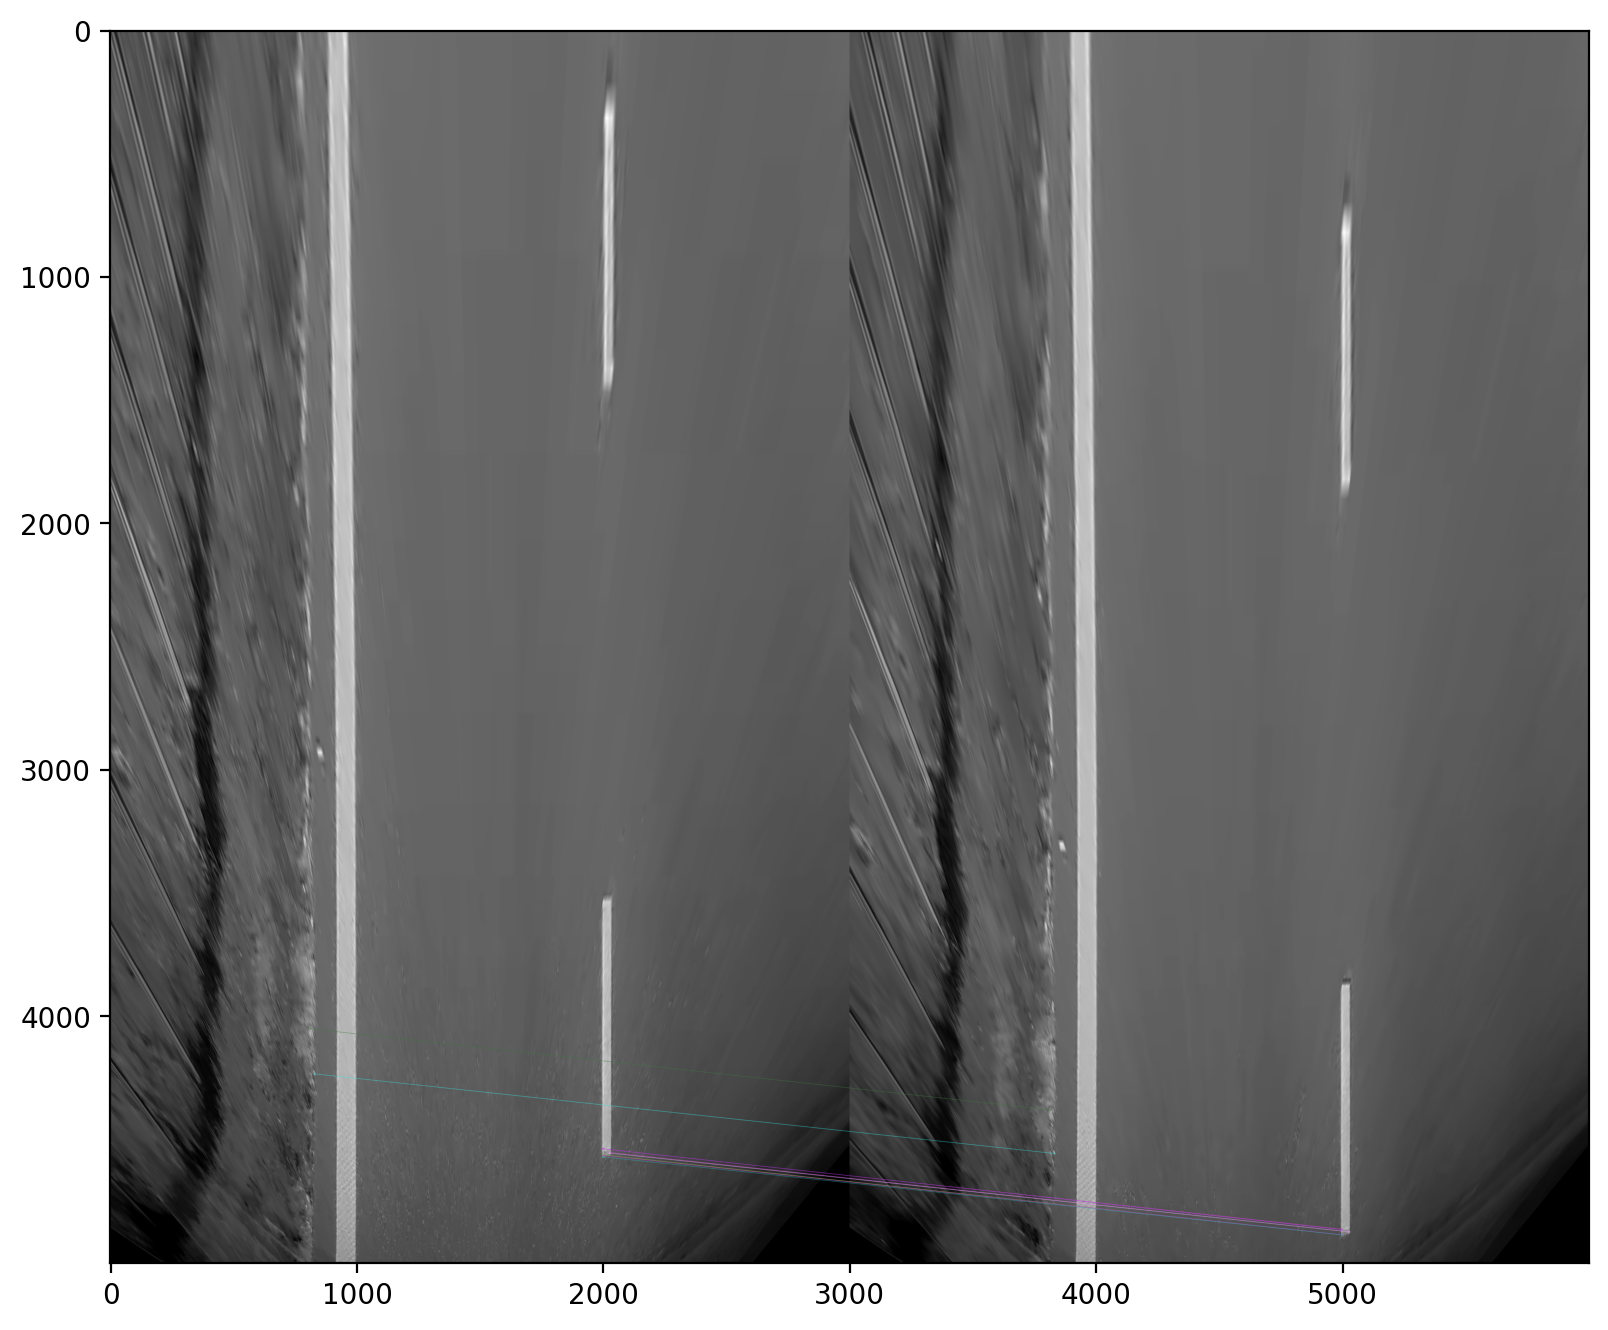

In [8]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)

matches = sorted(matches, key = lambda x:x.distance)

print([m.distance for m in matches[:10]])

img3 = cv2.drawMatches(bew1, kp1, bew2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3)